### mnist(SVM)

In [1]:
from keras.datasets import mnist

# 학습용과 검증용 분리

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0

X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

print(y_train[:5])

[5 0 4 1 9]


In [2]:
#시간이 오래 걸리므로 이미지 100장만 학습

from sklearn.svm import SVC

model = SVC()

model.fit(X_train[:100], y_train[:100])

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.6564666666666666
검증용: 0.6559


In [3]:
#최적의 C value와 gamma value를 찾는 과정

import matplotlib.pyplot as plt

import numpy as np

train_rate = []

test_rate = []

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:

    for g in g_values:

        # 모델 생성

        model = SVC(C=n,gamma=g,random_state=10)

        model.fit(X_train[:100], y_train[:100])

        # 학습용 데이터셋의 정확도

        train_rate.append([n,g,model.score(X_train[:100], y_train[:100])])

        # 검증용 데이터셋의 정확도

        test_rate.append([n,g,model.score(X_test[:100], y_test[:100])])

train_arr=np.array(train_rate) #검증용 데이터셋의 정확도

test_arr=np.array(test_rate) #검증용 데이터셋의 정확도

max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도

idx=np.where(test_arr[:,2] == max_rate)[0][0] #가장 성능이 좋은 인덱스

print("최적의 c:",test_rate[idx][0])

print("최적의 gamma:",test_rate[idx][1])

print("최적의 정확도:",test_rate[idx][2])

최적의 c: 10
최적의 gamma: 0.01
최적의 정확도: 0.7


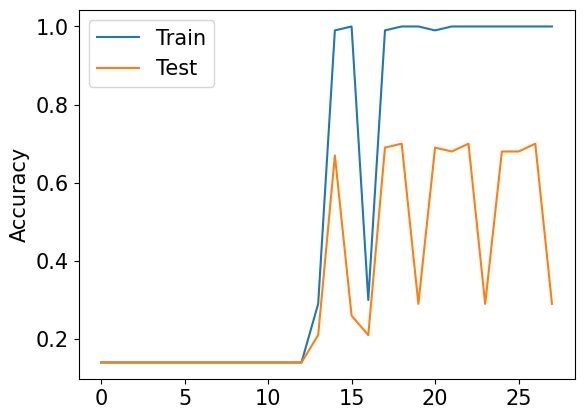

In [4]:
plt.rcParams["font.size"]=15

plt.plot(range(len(train_rate)), train_arr[:,2], label="Train")

plt.plot(range(len(test_rate)), test_arr[:,2], label="Test")

plt.ylabel("Accuracy")

plt.legend()

In [5]:
model = SVC(C=10, gamma=0.01)
model.fit(X_train[:100], y_train[:100])

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.6991166666666667
검증용: 0.699


In [6]:
#모형 저장

import pickle

pickle.dump(model, open('c:/data/mnist/mnist_svm.model', 'wb'))

In [7]:
# 모형 불러오기

model = pickle.load(open('c:/data/mnist/mnist_svm.model', 'rb'))

# 모형 사용

pred = model.predict(X_test[:10])

print('예측값:',pred[:10])

print('실제값:',y_test[:10])

예측값: [7 2 1 0 4 1 9 4 4 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


In [8]:
#confusion matrix(혼동행렬, 오분류표) 출력

from sklearn.metrics import confusion_matrix

import pandas as pd

pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)

df_cm=pd.DataFrame(cm, index=range(10),

                   columns=range(10))

df_cm

,0,1,2,3,4,5,6,7,8,9
0,867,1,3,3,30,15,26,10,1,24
1,0,1108,1,1,2,1,0,0,17,5
2,15,196,615,5,127,4,5,25,30,10
3,13,30,43,847,9,4,3,8,31,22
4,1,6,1,0,843,0,14,6,0,111
5,48,22,7,312,103,250,24,21,31,74
6,15,32,12,1,232,18,639,0,0,9
7,1,52,20,19,22,2,0,812,17,83
8,54,50,83,87,70,10,10,10,476,124
9,13,10,8,29,331,2,2,78,3,533
